[Current - Northern Territory Crime Statistics May 2022](https://data.nt.gov.au/dataset/current-northern-territory-crime-statistics-may-2022)

Offences in the Northern Territory can show strong seasonal patterns, with predictable peaks and troughs at certain times of the year.  Therefore, comparisons should be made of the same months in different years, rather than consecutive months.  For trends, a 12-month rolling average or rolling sum is recommended in order to dampen the month-to-month variability and account for the seasonal cycles.

Last update was July 1st 2022.

In [61]:
# Standard Data Science Helpers
import numpy as np
import pandas as pd
import scipy

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import os
from IPython.display import Image, display, HTML

In [2]:
dv_df = pd.read_csv('nt_crime_statistics_may_2022.csv')

In [3]:
dv_df.head()

,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
0,1/07/2022,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,Alice Springs,-,1
1,1/07/2022,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,NT Balance,Alligator,1
2,1/07/2022,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,Tennant Creek,-,1
3,1/07/2022,2008,1,Abduction - harassment and other offences agai...,Harassment and private nuisance,-,-,NT Balance,Alligator,2
4,1/07/2022,2008,1,Abduction - harassment and other offences agai...,Harassment and private nuisance,-,-,NT Balance,Daly,1


In [4]:
dv_df.tail()

,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
44989,1/07/2022,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,NT Balance,Weddell,5
44990,1/07/2022,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,NT Balance,West Arnhem,8
44991,1/07/2022,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,NT Balance,Yuendumu - Anmatjere,8
44992,1/07/2022,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,Palmerston,-,70
44993,1/07/2022,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,Tennant Creek,-,7


In [5]:
dv_df.describe()

,Year,Month number,Number of offences
count,44994.000000,44994.000000,44994.000000
mean,2014.867649,6.410366,9.346602
std,4.163936,3.495179,26.984379
min,2008.000000,1.000000,1.000000
25%,2011.000000,3.000000,1.000000
50%,2015.000000,6.000000,3.000000
75%,2018.000000,10.000000,6.000000
max,2022.000000,12.000000,458.000000


<p style='color: red'> The number of offences is the number of offences recorded per region per statistical area. The highest number of offences ever recorded is 458 property damage offences in Darwin in January 2010. </p>

* group together reporting region and statistical area.
* statistical area with maximum offences
* look into the type of offence prevalent in statistical area.
* look into the maximum offences per region.

In [66]:
dv_df[dv_df['Number of offences'] == 458]

,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
6111,2010,1,Property Damage Offences,Property damage offences,-,-,Darwin,-,458


In [71]:
dv_df[(dv_df['Year'] == 2010) & (dv_df['Month number'] == 1) & (dv_df['Offence category'] == 'Property Damage Offences')]

,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
6110,2010,1,Property Damage Offences,Property damage offences,-,-,Alice Springs,-,200
6111,2010,1,Property Damage Offences,Property damage offences,-,-,Darwin,-,458
6112,2010,1,Property Damage Offences,Property damage offences,-,-,Katherine,-,22
6113,2010,1,Property Damage Offences,Property damage offences,-,-,Nhulunbuy,-,6
6114,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Alligator,13
6115,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Anindilyakwa,3
6116,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Barkly,3
6117,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Daly,2
6118,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,East Arnhem,7
6119,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Elsey,2


In [27]:
dv_df.shape

(44994, 10)

In [6]:
dv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44994 entries, 0 to 44993
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   As At                44994 non-null  object
 1   Year                 44994 non-null  int64 
 2   Month number         44994 non-null  int64 
 3   Offence category     44994 non-null  object
 4   Offence type         44994 non-null  object
 5   Alcohol involvement  44994 non-null  object
 6   DV involvement       44994 non-null  object
 7   Reporting region     44994 non-null  object
 8   Statistical Area 2   44994 non-null  object
 9   Number of offences   44994 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.4+ MB


In [30]:
dv_df = dv_df.drop('As At', axis = 1)

In [31]:
dv_df.keys()

Index(['Year', 'Month number', 'Offence category', 'Offence type',
       'Alcohol involvement', 'DV involvement', 'Reporting region ',
       'Statistical Area 2', 'Number of offences'],
      dtype='object')

In [7]:
dv_df[['Offence category']].value_counts()

Offence category                                            
Acts intended to cause injury                                   16411
Commercial break-ins                                             5007
Motor theft and related offences                                 4240
Property Damage Offences                                         4210
Theft and related offences (other than MV)                       4155
House break-ins                                                  4086
Abduction - harassment and other offences against the person     2690
Sexual Assault and related offences                              2318
Other Dangerous or negligent acts endangering persons            1008
Robbery - extortion and related offences                          633
Homicide and related Offences                                     236
dtype: int64

<h1 style="color:blue">Offence Category Counts</h1>

<span style="color:blue"> Although it is a relief that homicide and related offences have the least amount of occurences, it is quite alarming that acts intended to cause injury has the highest count among the crimes reported.</span> 

<AxesSubplot:ylabel='Offence category'>

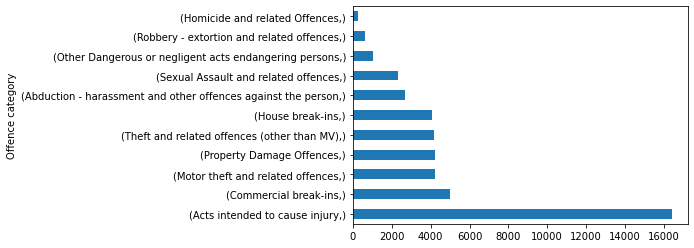

In [33]:
dv_df[['Offence category']].value_counts().plot(kind='barh')

<h1 style='color:blue'> Which region has the highest number of offences? </h1> 
<p style='color:blue'> The pie chart below shows that majority of the cases reported occurred in NT Balance.</p>

<AxesSubplot:ylabel='Regions'>

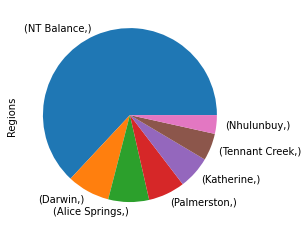

In [37]:
dv_df[['Reporting region ']].value_counts().plot(kind = 'pie', ylabel='Regions')

<p style='color: red'> There were 28,878 cases out of the total cases that were left blank. It can be assumed here that the alcohol involvement was unknown. Replace all - with Alcohol involvement unknown</p>

In [12]:
dv_df[['Alcohol involvement']].value_counts()

Alcohol involvement        
-                              28878
Alcohol involved                5952
No alcohol involved             5925
Alcohol involvement unknown     4239
dtype: int64

<p style='color: red'> There were 28,878 cases out of the total cases that were left blank. It can be assumed here that the domestic violence involvement was unknown. Replace all - with Domestic violence involvement unknown</p>

In [13]:
dv_df[['DV involvement']].value_counts()

DV involvement
-                 28878
DV                 8965
Non-DV             7151
dtype: int64

In [14]:
# look into crime by date
#  look into crime by territory
#  crime by season

In [58]:
dv_df['Year'].sort_values().value_counts(sort = False)

2008    2869
2009    3047
2010    2995
2011    2992
2012    3062
2013    3103
2014    3114
2015    3062
2016    3158
2017    3249
2018    3255
2019    3171
2020    3158
2021    3349
2022    1410
Name: Year, dtype: int64

In [51]:
dv_df[dv_df['Year'] == 2022]['Offence category'].value_counts()

Acts intended to cause injury                                   493
Commercial break-ins                                            179
House break-ins                                                 153
Motor theft and related offences                                132
Property Damage Offences                                        126
Theft and related offences (other than MV)                      126
Abduction - harassment and other offences against the person     72
Sexual Assault and related offences                              62
Other Dangerous or negligent acts endangering persons            32
Robbery - extortion and related offences                         24
Homicide and related Offences                                    11
Name: Offence category, dtype: int64

<p style='color: red'> Metadata states that the number of offences fluctuate depending on season but there is not much deviation in the number of offences reported for each month from 2008 - 2022.</p>
* Create a widget that shows bar graph per year. 
* Create bar graph with month in different colors showing crime fluctuation by month and year.

In [52]:
dv_df[dv_df['Year'] == 2022]['Month number'].value_counts(sort = False)

1    293
2    266
3    293
4    282
5    276
Name: Month number, dtype: int64

<AxesSubplot:>

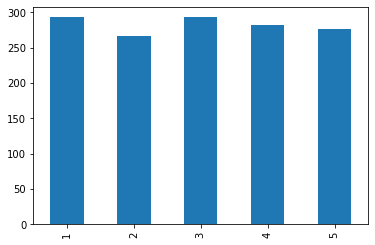

In [53]:
dv_df[dv_df['Year'] == 2022]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

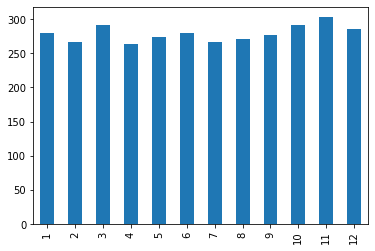

In [55]:
dv_df[dv_df['Year'] == 2021]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

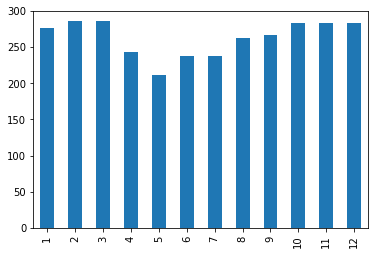

In [56]:
dv_df[dv_df['Year'] == 2020]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

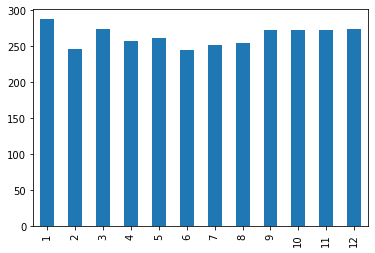

In [57]:
dv_df[dv_df['Year'] == 2019]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

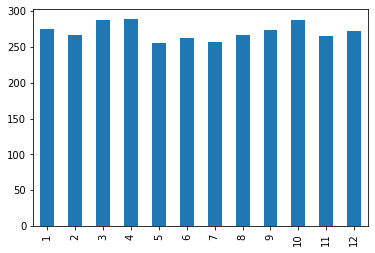

In [59]:
dv_df[dv_df['Year'] == 2018]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

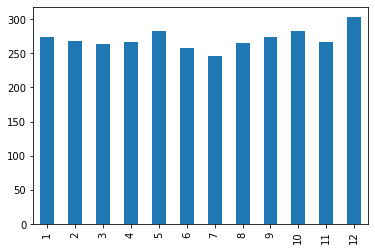

In [60]:
dv_df[dv_df['Year'] == 2017]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

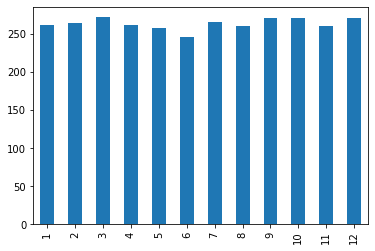

In [62]:
dv_df[dv_df['Year'] == 2016]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

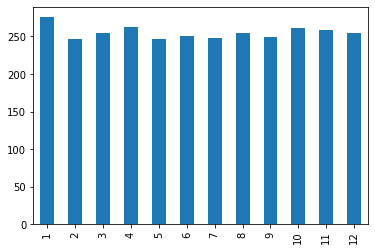

In [63]:
dv_df[dv_df['Year'] == 2015]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

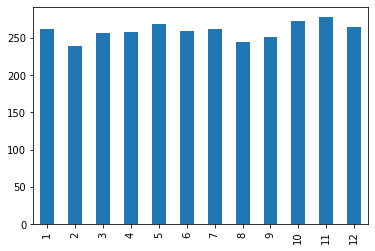

In [64]:
dv_df[dv_df['Year'] == 2014]['Month number'].value_counts(sort = False).plot(kind = 'bar')